# 1D mode solver
This section provides an example of mode solving for a 1D structure. This example is aslo used to illustrate the use of coordinate transformation in its real and complex variant.

## Importing packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import A_FMM

### Defining structure
The definition of a layer uses two classes. The class Creator is responsible for definiiton of the geometry, while the class Layer is responsible for defining the layer object used for simulation.
The creator object as a few geometry already inplemented. Please see documentaiton for details.

The next code block define a single layer contained the gemoetry of a 1D slab, apply real coordinate transformation and plot the epsilon profile reconstructed from fourier transform.

/home/marco/Documents/MyPrograms/A_FMM/test_venv/lib/python3.10/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/marco/Documents/MyPrograms/A_FMM/test_venv/lib/python3.10/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


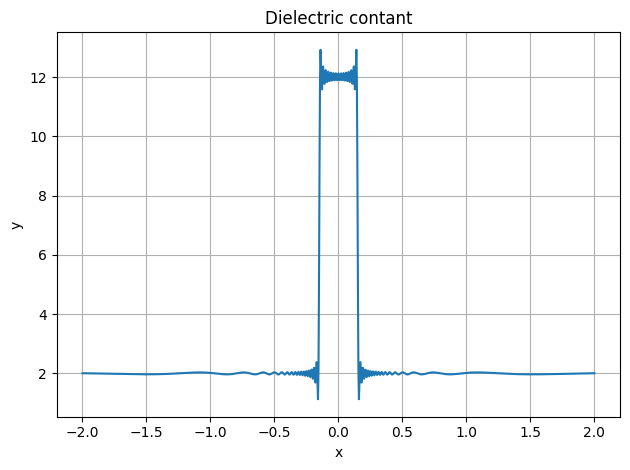

In [2]:
cr = A_FMM.Creator()
cr.slab(12.0, 2.0, 2.0, 0.3)
lay = A_FMM.Layer(Nx=50, Ny=0, creator=cr)
lay.transform(ex=0.5)

x = np.linspace(-2.0, 2.0, 1001)
eps = lay.calculate_epsilon(x)
plt.plot(x, np.squeeze(eps['eps']))
plt.xlabel('x'), plt.ylabel('y'), plt.title('Dielectric contant'), plt.grid() 
plt.tight_layout()

### Effective index and field calculation
The next code blocks calculates the modes of the layer, retrieves the effective index and mode profile of the first 4 modes, and plots them.

Mode0 effective index: (3.035543718671809+0j)
Mode1 effective index: (2.5933032596627057+3.859641243142317e-17j)
Mode2 effective index: (1.6594616309438428+0j)
Mode3 effective index: (1.426981387566051-2.5630187770423614e-16j)


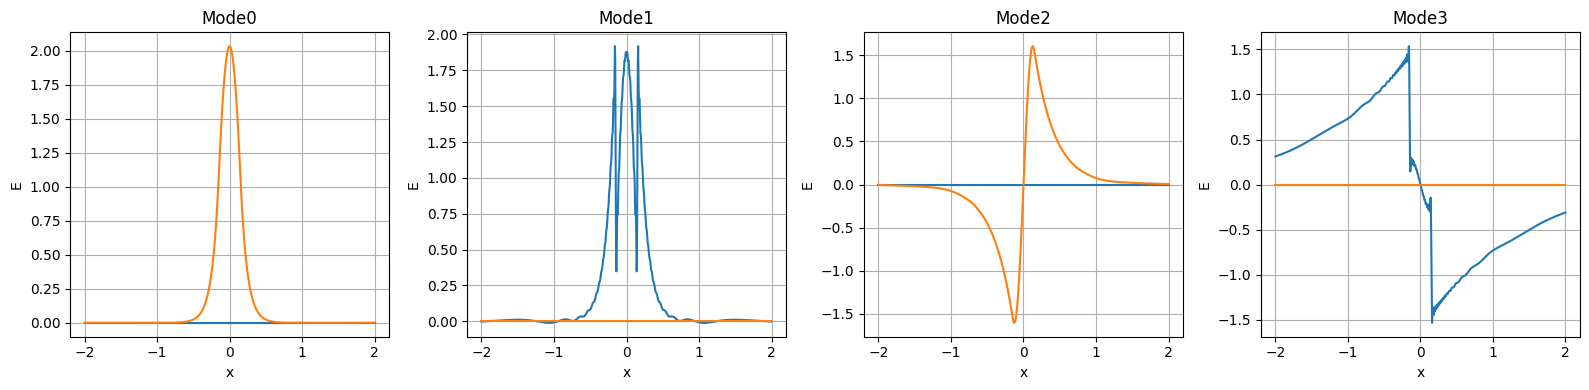

In [3]:
lay.mode(1.0/1.55)
index = lay.get_index()
fig, ax = plt.subplots(1,4, figsize=(16, 4))
for i in range(4):
    print(f'Mode{i} effective index: {index[i]}')
    u = lay.create_input({i:1.0})
    field = lay.calculate_field(u, x=x)
    Ex = np.squeeze(field['Ex'])
    Ey = np.squeeze(field['Ey'])
    ax[i].set_title(f'Mode{i}')
    ax[i].plot(x, np.real(Ex) + np.imag(Ex), label='Ex')
    ax[i].plot(x, np.real(Ey) + np.imag(Ey), label='Ex')

for a in ax:
    a.set_xlabel('x'), a.set_ylabel('E'), a.grid()

plt.tight_layout()


### Convergence sweep

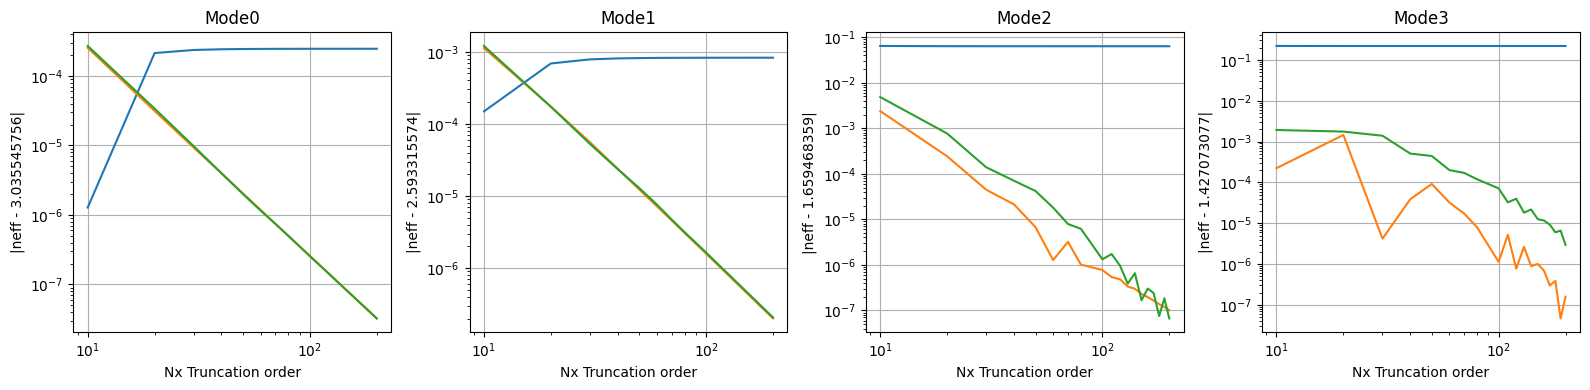

In [4]:
Nx_list = [10,20,30,40,50, 60, 70, 80 ,100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200]
Neff_no_trasform = {i : [] for i in range(4)}
Neff_re_trasform = {i : [] for i in range(4)}
Neff_cm_trasform = {i : [] for i in range(4)}
Nett_target = {
    0: 3.035545756,
    1: 2.593315574,
    2: 1.659468359,
    3: 1.427073077,
}
for Nx in Nx_list:
    lay = A_FMM.Layer(Nx=Nx, Ny=0, creator=cr)
    lay.mode(1.0/1.55)
    for i, li in Neff_no_trasform.items():
        li.append(lay.get_index()[i])

    lay.transform(ex=0.5)
    lay.mode(1.0/1.55)
    for i, li in Neff_re_trasform.items():
        li.append(lay.get_index()[i])

    lay.transform(ex=0.5, complex_transform=True)
    lay.mode(1.0/1.55)
    index = np.asarray(lay.get_index())
    for i, li in Neff_cm_trasform.items():
        order = np.argsort([abs(_ - Nett_target[i]) for _ in index])
        li.append(index[order[0]])


fig, ax = plt.subplots(1,4, figsize=(16, 4))
for i in range(4):
    ax[i].plot(Nx_list, [abs(_ -Nett_target[i]) for _ in Neff_no_trasform[i]])
    ax[i].plot(Nx_list, [abs(_ -Nett_target[i]) for _ in Neff_re_trasform[i]])
    ax[i].plot(Nx_list, [abs(_ -Nett_target[i]) for _ in Neff_cm_trasform[i]])
    ax[i].set_title(f'Mode{i}')
    ax[i].set_ylabel(f'|neff - {Nett_target[i]}|')
for a in ax:
    a.set_yscale('log'), a.set_xscale('log'), a.set_xlabel('Nx Truncation order'), a.grid()

plt.tight_layout()




### Effect of coordinate transform on plotting field.

Mode0 effective index: (3.035789650663311+0j)
Mode1 effective index: (2.594132291317708+3.4031786906360965e-15j)


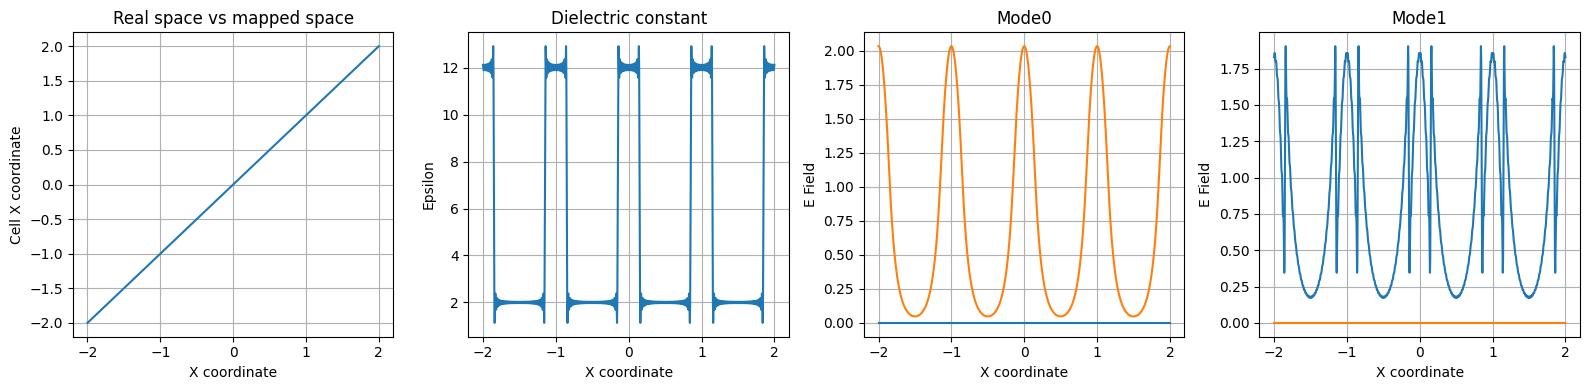

In [5]:
cr = A_FMM.Creator()
cr.slab(12.0, 2.0, 2.0, 0.3)
lay = A_FMM.Layer(Nx=50, Ny=0, creator=cr)

fig, ax = plt.subplots(1,4, figsize=(16, 4))
x = np.linspace(-2.0, 2.0, 1001)
eps = lay.calculate_epsilon(x)
ax[0].plot(x, np.squeeze(eps['x']))
ax[0].set_ylabel('Cell X coordinate')
ax[0].set_title('Real space vs mapped space')


ax[1].plot(x, np.squeeze(eps['eps']))
ax[1].set_ylabel('Epsilon')
ax[1].set_title('Dielectric constant')

lay.mode(1.0/1.55)
index = lay.get_index()
for i in range(2):
    print(f'Mode{i} effective index: {index[i]}')
    u = lay.create_input({i:1.0})
    field = lay.calculate_field(u, x=x)
    Ex = np.squeeze(field['Ex'])
    Ey = np.squeeze(field['Ey'])
    ax[i+2].set_title(f'Mode{i}')
    ax[i+2].plot(x, np.real(Ex) + np.imag(Ex))
    ax[i+2].plot(x, np.real(Ey) + np.imag(Ey))
    ax[i+2].set_ylabel('E Field')

for a in ax:
    a.set_xlabel('X coordinate'), a.grid()
plt.tight_layout()

Mode0 effective index: (3.035543718671809+0j)
Mode1 effective index: (2.5933032596627057+3.859641243142317e-17j)


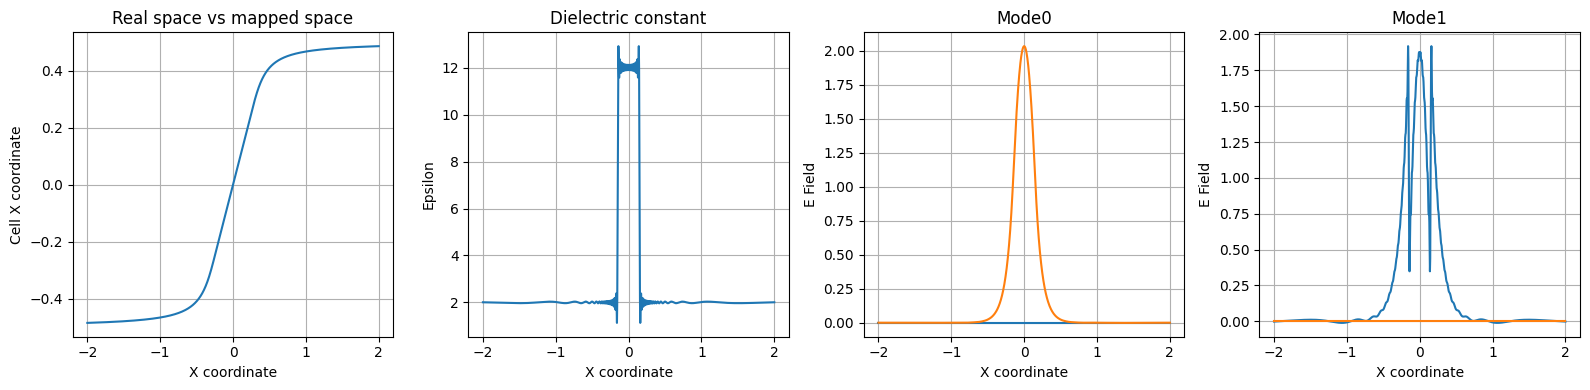

In [6]:
cr = A_FMM.Creator()
cr.slab(12.0, 2.0, 2.0, 0.3)
lay = A_FMM.Layer(Nx=50, Ny=0, creator=cr)
lay.transform(ex=0.5)

fig, ax = plt.subplots(1,4, figsize=(16, 4))
x = np.linspace(-2.0, 2.0, 1001)
eps = lay.calculate_epsilon(x)
ax[0].plot(x, np.squeeze(eps['x']))
ax[0].set_ylabel('Cell X coordinate')
ax[0].set_title('Real space vs mapped space')


ax[1].plot(x, np.squeeze(eps['eps']))
ax[1].set_ylabel('Epsilon')
ax[1].set_title('Dielectric constant')

lay.mode(1.0/1.55)
index = lay.get_index()
for i in range(2):
    print(f'Mode{i} effective index: {index[i]}')
    u = lay.create_input({i:1.0})
    field = lay.calculate_field(u, x=x)
    Ex = np.squeeze(field['Ex'])
    Ey = np.squeeze(field['Ey'])
    ax[i+2].set_title(f'Mode{i}')
    ax[i+2].plot(x, np.real(Ex) + np.imag(Ex))
    ax[i+2].plot(x, np.real(Ey) + np.imag(Ey))
    ax[i+2].set_ylabel('E Field')

for a in ax:
    a.set_xlabel('X coordinate'), a.grid()
plt.tight_layout()

/home/marco/Documents/MyPrograms/A_FMM/test_venv/lib/python3.10/site-packages/matplotlib/contour.py:1568: ComplexWarning: Casting complex values to real discards the imaginary part
  self.zmax = z.max().astype(float)
/home/marco/Documents/MyPrograms/A_FMM/test_venv/lib/python3.10/site-packages/matplotlib/contour.py:1569: ComplexWarning: Casting complex values to real discards the imaginary part
  self.zmin = z.min().astype(float)
/home/marco/Documents/MyPrograms/A_FMM/test_venv/lib/python3.10/site-packages/numpy/ma/core.py:2820: ComplexWarning: Casting complex values to real discards the imaginary part
  _data = np.array(data, dtype=dtype, copy=copy,


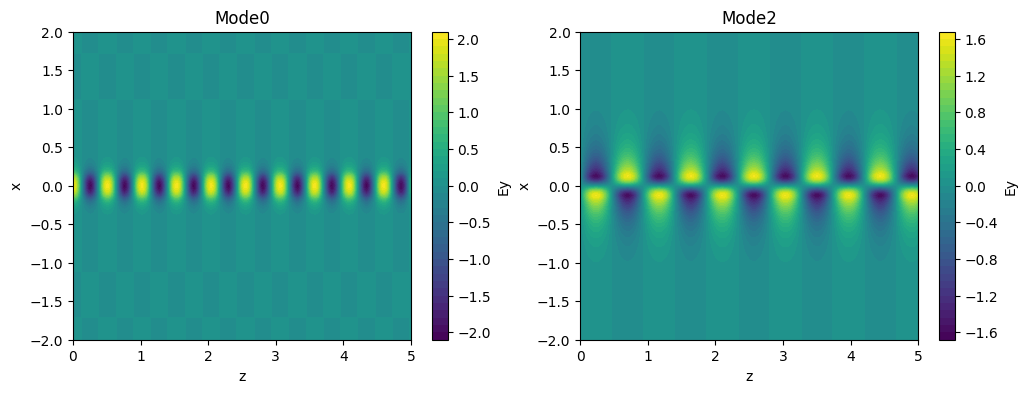

In [7]:
z = np.linspace(0.0, 5.0, 501)
fig, ax = plt.subplots(1,2, figsize=(12, 4))

u = lay.create_input({0:1.0})
field = lay.calculate_field(u, x=x, z=z)
_ = ax[0].contourf(z,x, np.squeeze(field['Ey']), levels=41)
fig.colorbar(_, ax=ax[0], label='Ey')
ax[0].set_title('Mode0')

u = lay.create_input({2:1.0})
field = lay.calculate_field(u, x=x, z=z)
_=ax[1].contourf(z,x, np.squeeze(field['Ey']), levels=41)
fig.colorbar(_, ax=ax[1], label='Ey')
ax[1].set_title('Mode2')

for a in ax:
    a.set_xlabel('z'), a.set_ylabel('x')